# Assignment 1

*Part of the course:
Machine Learning (code: INFOB3ML), fall 2021, Utrecht University*

Total points: 9 (+ 1 for free)

Submit one ipynb file per pair.

**Before you submit, click Kernel > Restart & Run All to make sure you submit a working version of your code!**

## Linear Regression with Regularisation
In the final assignment of Introduction to Machine Learning, you performed several simulation experiments with linear regression, examining the impact of different target functions, different hypothesis classes, different noise levels, and different amounts of training data on the performance of linear regression. (If you didn't do that assignment, don't worry: everything you need to know about it is also in chapter 1 of the Rogers & Girolami book.)

In this assignment, we continue such simulation experiments, this time in order to investigate a new topic: regularisation.

## Overview
### Data generation
Every datapoint $(x,t)$ will be sampled randomly, with both $x$ and $t$ in $\mathbb{R}$. (Note that the book from Introduction to Machine Learning called the output $y$, while this course's book calls it $t$.) The input $x$ is normally distributed, with expected value = 0 and variance = 1. 

Once we have our input $x$, we generate our output $t$ according to $t = \sin(x) + \epsilon$, where $\epsilon$ is normally distributed with expected value = 0 and variance = $\sigma^2$.
All the random numbers should be generated **independently** from one another.

### Regression

We'll implement *regularised* regression, adding a penalty $\lambda \mathbf{w}^T \mathbf{w}$ to our training loss. Linear regression with this form of regularisation penalty is also called *ridge regression*. We are going to try out different values of $\lambda$.

We'll use regression with order five polynomials like in the book. This means that for each weight vector $\mathbf{w}$, our hypothesis is of the form
$$f(x; \mathbf{w}) = \sum_{i=0}^5 w_i x^i.$$

## Your Code

To make it clear what your code is supposed to do and how it should be formatted, we provide you general schema for each to-be-written function. Some functions come with additional hints about useful in-built functions or procedural details. You might write the function's body differently than the hints suggests. That's totally fine as long as the function works as it supposed to work.
Please **remove the provided hints** (formatted as comments) because they are redundunt after the code is written.

Use numpy for functionalities involving vectors and matrices. [Here is a handy guide (in notebook form) that deals with numpy arrays, matrices and number generation.](https://github.com/ageron/handson-ml/blob/master/tools_numpy.ipynb)

### Data generation with noise

**Assignment 1** (1 point)

Write a function `generate_data` you can use to generate a dataset and outputs the pair of vectors `(x,t)`, accepting parameters $N$ and $\sigma^2$. Be sure to check if your normal-distribution-generator needs $\sigma$ (standard deviation) or $\sigma^2$ (variance) as input parameter. But `x` and `t` should be 1-dimensional numpy arrays, i.e. their shape should be `(N,)`.

In [1]:
import numpy as np
import math

def generate_data(N, sigma_squared):
    x = np.random.randn(N)
    e = math.sqrt(sigma_squared) * np.random.randn(N)
    t = e
    for i in range(len(x)):
        t[i] += math.sin(x[i])# + e
    return (x, t)

In [2]:
# ██████████ TEST ██████████
# (These "TEST" blocks can help you quickly check if there's something obviously wrong with the code you wrote.)
# Setting a seed helps to make the data generation deterministic for comparison reasons
np.random.seed(0) 
toy_xs, toy_t = generate_data(3, 0.1)
# Check the shapes of the output arrays are as specified above:
print(toy_xs.shape)
print(toy_xs)
print(toy_t.shape)
print(toy_t)

(3,)
[1.76405235 0.40015721 0.97873798]
(3,)
[1.69001675 0.98013683 0.52075134]


**Assignment 2** (1 point)

Write a function `compute_X_matrix` that takes a numpy array of `x`s as produced by your code above, and returns the matrix `X` needed by linear regression with 5th-order polynomials. (See equation (1.18) on page 28 of the book for what this matrix should look like.)

In [3]:
def compute_X_matrix(x_scalars):
    order = 6
    X = x_scalars.reshape(-1, 1)
    for i in range(order-1):
        X = np.hstack((X, x_scalars.reshape(-1, 1)))  
    for i in range(order):
        X[:,i] = pow(X[:,i], i)
    return X

In [4]:
# ██████████ TEST ██████████
toy_X = compute_X_matrix(toy_xs)
print(toy_xs)
print(toy_X)
print(toy_X.shape)

[1.76405235 0.40015721 0.97873798]
[[1.00000000e+00 1.76405235e+00 3.11188068e+00 5.48952041e+00
  9.68380136e+00 1.70827325e+01]
 [1.00000000e+00 4.00157208e-01 1.60125791e-01 6.40754897e-02
  2.56402691e-02 1.02601385e-02]
 [1.00000000e+00 9.78737984e-01 9.57928042e-01 9.37560560e-01
  9.17626133e-01 8.98115551e-01]]
(3, 6)


### Fitting linear regression

**Assignment 3** (1 point)

Write code that fits a regularised linear regression hypothesis to training data, in other words, a function that computes our $\hat{\mathbf{w}}$. Use numpy to carry out the necessary matrix operations to find an analytic solution; don't use linear regression functionality from Python packages for machine learning. In other words, compute $\hat{\mathbf{w}}$ according to the equation (1.21) on page 36 of the book. Give your function a parameter `lamb` which tells it the value of $\lambda$.
   

In [5]:
import numpy.linalg as linalg

def fit_ridge(X, t, lamb): 
    N, k = X.shape
    I = np.eye(k)
    a = X.transpose()@ X + N*lamb*I
    w_hat = linalg.inv(X.transpose() @ X + (N*lamb*I)) @ (X.transpose() @ t)
    return w_hat


In [6]:
# ██████████ TEST ██████████
# this test uses values for toy_X and toy_t printed above
# You migh need to define these values by hand
# if your "generate_data" returns different data
print(toy_X)
print(toy_t)
print("1",fit_ridge(toy_X, toy_t, 0.01))
print("2",fit_ridge(toy_X, toy_t, 100))

[[1.00000000e+00 1.76405235e+00 3.11188068e+00 5.48952041e+00
  9.68380136e+00 1.70827325e+01]
 [1.00000000e+00 4.00157208e-01 1.60125791e-01 6.40754897e-02
  2.56402691e-02 1.02601385e-02]
 [1.00000000e+00 9.78737984e-01 9.57928042e-01 9.37560560e-01
  9.17626133e-01 8.98115551e-01]]
[1.69001675 0.98013683 0.52075134]
1 [ 0.99017999  0.01908043 -0.30146412 -0.31726591 -0.13260514  0.27093888]
2 [0.00689006 0.0066329  0.00884104 0.01381528 0.02303538 0.03949154]


### Squared loss over the data

The following code (which you don't need to change) evaluates a learned linear regression function $\hat{\mathbf{w}}$ with respect to the data $\mathbf{X}, \mathbf{t}$ using the squared error loss. This Python function can be used to compute training, validation or test loss for $\hat{\mathbf{w}}$, depending of the kind of data passed to it.

In [7]:
def compute_loss(w, X, t):
    N, k = X.shape
    t_hat = X @ w
    t_error = t_hat - t
    sum_of_squared_errors = t_error.T @ t_error
    loss = sum_of_squared_errors / N
    return loss

## Visualising regularisation

Now it's time to do some experiments and look at the results.

First, the function provided below will plot the target function $\sin(x)$, a regression function, and the training data all in one plot. 

In [8]:
import matplotlib.pyplot as plt

def plot_regression_result(xs_train, t_train, w, include_target_function=True):
    xs_plot = np.linspace(-3, 3, 101)
    d = [xs_plot,1]
    X_plot = compute_X_matrix(xs_plot)
    if include_target_function:
        plt.plot(xs_plot, np.sin(xs_plot), c='black') # target 
    plt.scatter(xs_train, t_train, c='blue', marker=".")
    plt.plot(xs_plot, X_plot @ w, c='red')
    plt.ylim(-1.5, 1.5)
    plt.show()
    
    

**Assignment 4** (1 point)

Generate a dataset of $N=10$ data points with noise level $\sigma^2 = 0.1$. (You'll use this dataset in assignments/questions 4 through 6). For the values of $\lambda$ provided in the code below, fit a regularised regression curve to the data and compute the loss. Display the results in a plot.

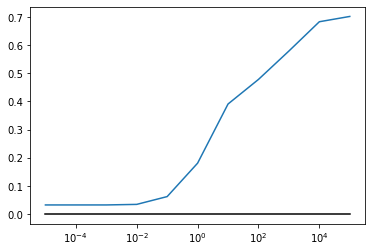

In [9]:
lambdas = 10 ** np.linspace(-5, 5, 11)
losses = np.zeros_like(lambdas)

np.random.seed(0)

lamb_loss = np.full(lambdas.shape, None)

x, t = generate_data(10, 0.1)
X = compute_X_matrix(x)
for i in range(len(lambdas)):
    lamb = lambdas[i]
    w = fit_ridge(X, t, lamb)
    loss = compute_loss(w, X, t)
    lamb_loss[i] = loss

plt.semilogx(lambdas, lamb_loss)    
plt.semilogx(lambdas, losses, c='black')
plt.show()

**Question 5** (1 point) Your plot should show that as $\lambda$ gets larger, the loss also gets larger. Explain why this is to be expected.

**Answer** The 5th order polynomial, when unregularized (lambda = 0) the model fits the data quit well, however it is trained to idosyncratic characteristics or noise of the trainings data set. The aim of a higher lambda or degree of smoothing is to let the algorithm "pay less attention to the noise in the tranings data", hence improve generalization. The smoothing of the regression line by penalizing the absolut value of w lead to a reducion in overfiting, because the model is not too strongly tailored to the training set.

However, when smoothing is to high, the model does not fit to the traning data at all (or less and less with increased smooting), leading to an increase in the trainings loss. 

More specifically, when increasing lambda, the loss is penalized, where w is still optimized with respect to the training data, but at the same time the weights are kept as low as possible (close to zero), because every weight that is far away from zero, the sum of squares of the weight is large, which will increase the sum and thus increase the error loss. If lambda is increased the penalty of the penalty term is increased, therefore all weights are more strongly reduced towards zero to keep the error loss low. When lambda is very high (e.g. 10000) all weights will be zero and the regression line will be come a horizontal line (constant), since even the smalles deviation of a weights value from zero will lead to an enormous penalty with repect to the loss. Thus the most optimal solution under these conditions (were lambda is very high) is wi = 0.

**Assignment/Question 6** (1 point)

Using the same data, answer the following questions:

For what values of $\lambda$ do you clearly see overfitting? For what values of $\lambda$ do you see underfitting? To support your answer, include plots for some values of $\lambda$, and point out what features of those plots tell you that over-/underfitting is going on.

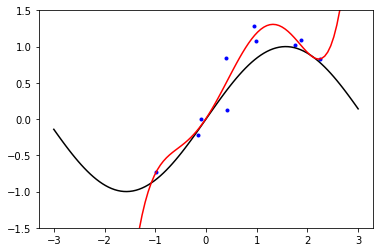

lambda 1e-05 loss 0.03255952856761363


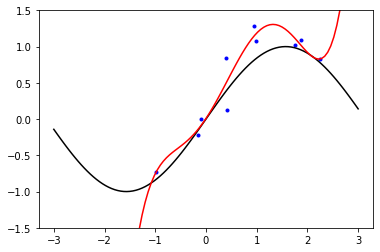

lambda 0.0001 loss 0.03255984635651247


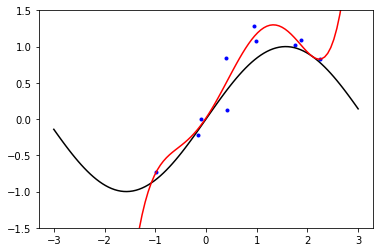

lambda 0.001 loss 0.032589917806732455


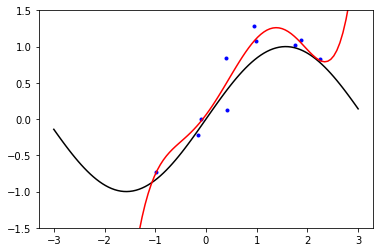

lambda 0.01 loss 0.034556535530992874


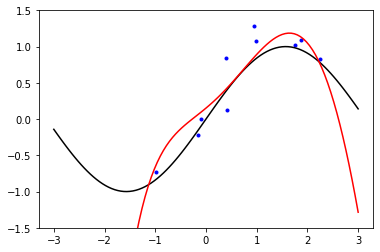

lambda 0.1 loss 0.062251008900267524


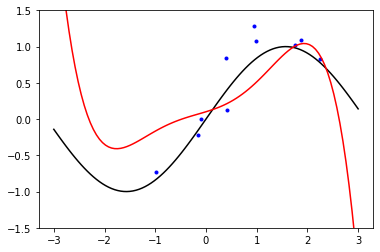

lambda 1.0 loss 0.180901397680083


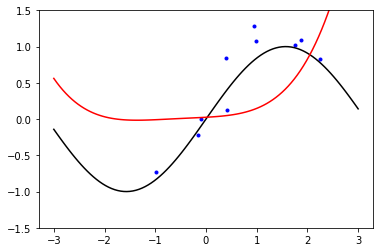

lambda 10.0 loss 0.3909360952252797


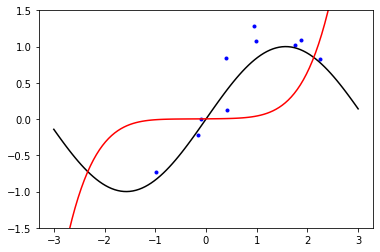

lambda 100.0 loss 0.47825297233003833


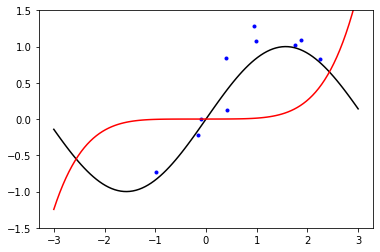

lambda 1000.0 loss 0.5790936859296413


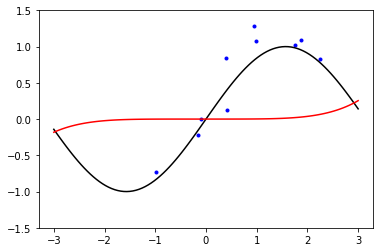

lambda 10000.0 loss 0.6830491381872328


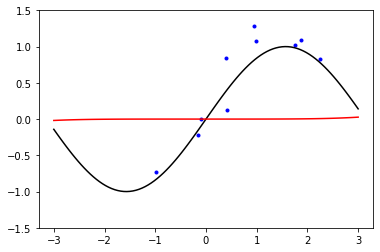

lambda 100000.0 loss 0.7018457197325705


In [10]:
for i in range(len(lambdas)):
    lamb = lambdas[i]
    w = fit_ridge(X, t, lamb)
    loss = compute_loss(w, X, t)
    lamb_loss[i] = loss
    plot_regression_result(x, t, w)
    print("lambda", lambdas[i], "loss", loss)

**Answer**  Upon visual inspection, the traningsloss (0.180) for lambda = 1 seems to provide the most reasonable results, since any fit of the 5th degree polynomial does not follow the sinoid function outside of the training data points. The model pays to much attention to the idosynchratic characteristics and prediction of possible future datapoints outside of the bounds of the training data. Therefore the models are overfitting (whether this is the case for all lambda = 0.1 is discussable, but certainly all lambdas prior to 0.1).

When to much regularization is applied the model does an overal poor job to fit the data, with the most extreme case of a straight horizontal line (~ 0 when lambda is very high: lambda = 100000), hence the model does not fit the data at all and underfitting increases after lambda = 1 (or 0.1, depedning on the subjective judgment).

## Cross-validation

To find a good value of $\lambda$, a variety of techniques exist. One that obviously does *not* work is to look at the training loss as a function of $\lambda$ (like you plotted above): that would always suggest to make $\lambda$ as small as possible! A versatile technique that you've already seen in Introduction to Machine Learning (or in section 1.5 of the book) is **cross-validation**.

**Assignment 7** (1 point)

Write some code to do the following: sample a new dataset of $N = 50$ data points and $\sigma^2=0.1$. (You'll use this dataset for all the remaining assignments and questions.) Write a function that, given data and value of $\lambda$, computes the leave-one-out cross-validation (LOOCV) loss, as explained in section 1.5.2 of the book. Then make a plot similar to what we did before for the training loss, but this time displaying the LOOCV loss as a function of $\lambda$.

Note that the third argument, `fitting_function`, should be the name of a function that `LOOCV` can call to compute `w`. If `fit_ridge` is passed, your previously written function will be used. But later, you'll call it with a different fitting function.

In [11]:
def LOOCV(X, t, fitting_function, lamb):
    N, k = X.shape
    sum_of_losses = 0.0
    for leave_out in range(N):
        testx = X[leave_out:(leave_out+1), :]
        testt = t[leave_out:(leave_out+1)]
        
        trainx = np.delete(X,leave_out,0)
        traint = np.delete(t,leave_out,0)
       
        w = fitting_function(trainx, traint, lamb)
        sum_of_losses += compute_loss(w, testx, testt)
        pass
  
    return sum_of_losses / N

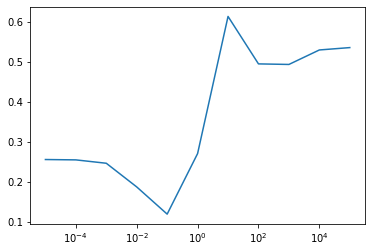

In [12]:
np.random.seed(0)

x,t  = generate_data(50, 0.1)
X = compute_X_matrix(x)
lambdas = 10 ** np.linspace(-5, 5, 11)
Av_SoL = np.zeros(len(lambdas))

for lamb in range(len(lambdas)):
    Av_SoL[lamb] = LOOCV(X, t, fit_ridge,lambdas[lamb])

plt.semilogx(lambdas, Av_SoL)
plt.show() 

**Question 8** (0.5 points): What value of $\lambda$ does LOOCV point you to? Look at a plot of the resulting regression function. Does it look reasonable?

**Answer** Lambda = 10^-1 seems to yield the most optimal solution (also with respect top under/overfitting). As mentioned in question 4 the Lambda of 10^-1 is not perfect based on visual inspectetion, since it does not capture the sin function of x completely, yet it has the lowest loss of all lambdas (that fits all data points the best). For this training set it fits quite well but lambda 10^0 would fit the sine wave better, when new (randomly) sampled trainings data (of the same sine function) is provided to the algorithm.

## Lasso regression

As the book mentions, when doing regularisation, using the squares of $\mathbf{w}$ as a penalty is just one of many possibilities. It has the advantage of having an analytical solution. But other options exist that may have other advantages, and while they may not be analytically computable, still there exist efficient algorithms for working with them. A particularly popular one is to use the sum of absolute values of $\mathbf{w}$ as a penalty: we will find the $\mathbf{w}$ that minimizes
$$\mathcal{L}' = \mathcal{L} + \lambda \sum_i \lvert w_i \rvert.$$
This is called the 'lasso' (which is an acronym for 'least absolute shrinkage and selection operator', but of course most people just remember the acronym).

There is no direct formula for computing the $\mathbf{w}$ that minimizes $\mathcal{L}'$. The next alternative would be to use (stochastic) gradient descent. Unfortunately, that also doesn't work very nicely here, because as a function of $\mathbf{w}$, $\mathcal{L}'$ is not differentiable wherever $\mathbf{w}$ has at least one entry equal to zero. But variants of gradient descent have been developed that can deal with this problem (such as [proximal gradient descent](https://en.wikipedia.org/wiki/Proximal_gradient_method)), and implementations are readily available. The fitting function provided below uses such an implementation.

In [13]:
from sklearn.linear_model import Lasso

def fit_lasso(X, t, lamb):
    clf = Lasso(lamb, fit_intercept=False, max_iter=100000)
    clf.fit(X, t)
    return clf.coef_

**Assignment 9** (0.5 point) Again plot the LOOCV losses as a function of $\lambda$, but this time for lasso regression instead of ridge regression.

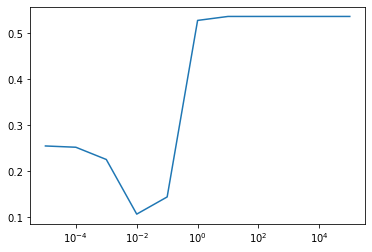

In [14]:
np.random.seed(0)

x,t  = generate_data(50, 0.1)
X = compute_X_matrix(x)
lambdas = 10 ** np.linspace(-5, 5, 11)

Av_SoL = np.zeros(len(lambdas))

for lamb in range(len(lambdas)):
    Av_SoL[lamb] = LOOCV(X, t, fit_lasso,lambdas[lamb])
plt.semilogx(lambdas, Av_SoL)  
plt.show()    

An important property of lasso regularisation is its tendency to make some weigths exactly equal to 0. (Well, mathematically that's true, but you should never rely on things being *exactly* equal when a numerical algorithm is involved. Instead, check whether the difference between them is very small, say less than `1e-9`.)

**Assignment 10** (0.5 points)

What is the smallest $\lambda$ in `lambdas` for which you observe this happening for some $w_i$? For that $\lambda$, make a plot where $w_0$ varies along the horizontal axis. On the vertical axis, plot the regularised loss $\mathcal{L}'$ of the weight vector, with all entries other than $w_i$ kept equal to the optimal lasso solution. Choose the range of $w_i$-values small enough that you see a nondifferentiability in the graph.

1e-05 No
0.0001 No
0.001 Yes
---------------------------------------------------------- 
 w0_p [(11, 4), (28, 4), (31, 0), (33, 2), (39, 0), (47, 0)] 
 #######################################################- 
 w0 [array([0.011071989487229804, 0.9348288394185108, -0.014957604774354604,
       -0.10860693741673652, -0.0, -0.0023176693613173468], dtype=object), array([0.010763821360670832, 0.9330959776248751, -0.014924112200112255,
       -0.1076970787095193, 0.0, -0.0024164693960462406], dtype=object), array([0.0, 0.9145300942153928, -0.01131594203947663,
       -0.09903745524824885, -0.00041041277092703524,
       -0.003365841691735349], dtype=object), array([0.0026513089795603393, 1.0016609242099428, 0.0,
       -0.1795940063380367, 0.0016451296991472966, 0.007706313482005085],
      dtype=object), array([0.0, 0.9526262377883253, -0.012833875641853398,
       -0.12246879901685581, 0.00034183712623591907,
       -0.0003872308920917528], dtype=object), array([-0.0, 0.876829325445277, -0

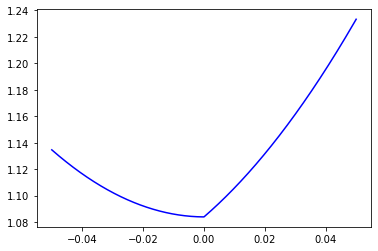

In [15]:
def LOOCV_find_w0(X, t, fitting_function, lamb):
    N, k = X.shape
    W = np.full(X.shape, None)
    w0 = list(); w0_p = list(); w0_num = 0; w0_testx = list(); w0_testt = list()
    minimal = 10 ** -9
        
    for i in range(N):
        testx = X[i:(i + 1), :]
        testt = t[i:(i + 1)]
        
        trainx = np.delete(X,i,0)
        traint = np.delete(t,i,0)
        
        W[i] = fitting_function(trainx, traint, lamb)
        pass

        for j in range(k):
            if np.abs(W[i, j]) < minimal:
                
                w0_p.append((i,j))
                w0.append(W[i])
                w0_testx.append(testx)
                w0_testt.append(testt)
                
                w0_num += 1
    return (W, w0, w0_p, w0_testx, w0_testt, w0_num)  
  
def LOOCV_loss_w0(w0, w0_p, w0_testx, w0_testt):       
    wi_W = np.linspace(-0.05,0.05, 50000)
    wi_L = np.zeros_like(wi_W)

    w0_var = w0
    is0i, is0j = w0_p

    for w0_steps in range(len(wi_W)):
        w0_var[is0j] = wi_W[w0_steps]
        wi_L[w0_steps] = compute_loss(w0_var, w0_testx, w0_testt) + sum(np.abs(w0_var))

    return (wi_W, wi_L)  


np.random.seed(0)

N = 50; sigma_squared = 0.1
x,t  = generate_data(N, sigma_squared)
X = compute_X_matrix(x)
lambdas = 10 ** np.linspace(-5, 5, 11)

for lamb in range(len(lambdas)):
    W, w0, w0_p, w0_testx, w0_testt, w0_num = LOOCV_find_w0(X, t, fit_lasso,lambdas[lamb])
    
    if 0 not in W: print(lambdas[lamb], "No")
        
    else: print(lambdas[lamb], "Yes")
    if w0_num != 0:
        
        print("----------------------------------------------------------",
              "\n", "w0_p", w0_p,
              "\n","#######################################################-",
              "\n", "w0", w0,
              "\n","#######################################################-",
              "\n", "W", W)
        
        break
#for w in range(len(w0)):
wi_W, wi_L = LOOCV_loss_w0(w0[0], w0_p[0], w0_testx[0], w0_testt[0])   

plt.plot(wi_W, wi_L, c = 'blue')
plt.show()

**Question 11** (0.5 points): Use this graph to explain why lasso regression has a tendency to make some weights equal to 0.

**Answer** Lasso (or L1) regularization reduces large and small weights equally. When minimizing ∑i|wi|, minimizing any of the |wi| contributes equally to the overall minimization, thus taking the same bit from each wi when minimizing. Therefore, some may reach 0 before others: these are "pruned", and stop contributing to the problem. This way lasso regularization allows for feature selection, by eliminating features that seem not to contribute to the prediction of the target variable (e.g. oscar movies in in the past years would not contribute to estimation of olympic running times).

The plot, the loss for each variation of wi, shows a convex function that is nondifferential at 0  also with its global minimum at 0. The losses can not be optimized further than with wi beeing at zero for features that are not relevant for the prediction.

Side note: In comparison to ridge (or L2) regularization, which penalizes the square of weights, lasso regression tends far more to drive small weights to 0. Because, when minimizing ∑i wi^2, however, diminishing the same little bit each |wi| does not help equally! Due to the square, larger |wi| contribute more to the loss than smaller |wi|. So, the optimization prioritizes removing more from the large elements. To be precise, the amount of magnitude in play here, to be "shrinked", is proportional to the magnitude of the weights: larger weights lose more, smaller ones lose less. Therefore, the "force" pushing small weights to 0 is very small. 

    
---

<br>
<br>

**Remember: Before you submit, click Kernel > Restart & Run All to make sure you submit a working version of your code!**<br/>
**Also remove our hints/comments from your code**